In [ ]:
# To-Do
#1)

In [33]:
# Import the needed libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5

from tensorflow.keras import datasets, layers, models

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.regularizers import l2, l1
from keras.utils import normalize, to_categorical
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

import sys
sys.path.insert(0, '/home/btannenw/Desktop/ML/dihiggsMLProject/')
from utils.commonFunctions import *

In [2]:
# Get image data
hh_imgs  = h5.File('/home/btannenw/Desktop/ML/dihiggsMLProject/convolutionalNN/test_pp2hh4b_25k_composite/images/test_pp2hh4b_25k_composite_allImages.h5', 'r')
qcd_imgs = h5.File('/home/btannenw/Desktop/ML/dihiggsMLProject/convolutionalNN/test_ppTo4b_50k_composite/images/test_ppTo4b_50k_composite_allImages.h5', 'r')

In [ ]:
# Make composite dihiggs images
#hh_combImages = []
##for iEvt in range(0, len(hh_imgs['trackImgs'])):
#for iEvt in range(0, 5000):
#    if iEvt%500 == 0:
#        print('Processed {} dihiggs events'.format(iEvt) )
#    hh_combImages.append( np.stack( (hh_imgs['trackImgs'][iEvt], hh_imgs['nHadronImgs'][iEvt], hh_imgs['photonImgs'][iEvt]), axis=-1) )
#print(len(hh_combImages))

In [ ]:
# Make composite qcd images
#qcd_combImages = []
##for iEvt in range(0, len(hh_imgs['trackImgs'])):
#for iEvt in range(0, 5000):
#    if iEvt%500 == 0:
#        print('Processed {} qcd events'.format(iEvt) )
#    qcd_combImages.append( np.stack( (qcd_imgs['trackImgs'][iEvt], qcd_imgs['nHadronImgs'][iEvt], qcd_imgs['photonImgs'][iEvt]), axis=-1) )
#print(len(qcd_combImages))

In [3]:
nEvents = 24000

# Make labels and combined datasets
hh_labels = np.ones( nEvents )
qcd_labels = np.zeros( nEvents )

#hh = np.stack( (hh_combImages), axis=0)
#qcd = np.stack( (qcd_combImages), axis=0)
hh = hh_imgs['compositeImgs'][:nEvents]
qcd = qcd_imgs['compositeImgs'][:nEvents]

all_images = np.concatenate ( (hh.copy(), qcd.copy()), axis=0)
all_labels = np.concatenate ( (hh_labels.copy(), qcd_labels.copy()), axis=0)
print(all_images.shape, all_labels.shape)

#all_images, all_labels = shuffle(all_images, all_labels, random_state=0)
imgs_train, imgs_test, labels_train, labels_test = train_test_split(all_images, all_labels, test_size=0.1, shuffle= True, random_state=30)


(48000, 51, 51, 3) (48000,)


In [4]:
model = Sequential()

# convolutional part
model.add( Conv2D(32, (7, 7), activation='relu', input_shape=(51, 51, 3)) )
model.add( MaxPooling2D((5, 5)) )
model.add( Conv2D(64, (3, 3), activation='relu'))
model.add( MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# feed-forward part
model.add( Flatten())
model.add( Dense(64, activation='relu'))
#model.add( Dropout(0.2) )
model.add( Dense(1) )


In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 45, 45, 32)        4736      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
history = model.fit(imgs_train, labels_train, epochs=10, 
                    shuffle=True,
                    batch_size=256,
                    validation_data=(imgs_test, labels_test))

Train on 43200 samples, validate on 4800 samples
Epoch 1/10
43200/43200 [==============================] - 69s 2ms/step - loss: 0.5843 - accuracy: 0.7002 - val_loss: 0.5850 - val_accuracy: 0.6969
Epoch 2/10
43200/43200 [==============================] - 68s 2ms/step - loss: 0.5699 - accuracy: 0.7088 - val_loss: 0.5807 - val_accuracy: 0.7004
Epoch 3/10
43200/43200 [==============================] - 70s 2ms/step - loss: 0.5759 - accuracy: 0.7040 - val_loss: 0.5805 - val_accuracy: 0.7027
Epoch 4/10
43200/43200 [==============================] - 69s 2ms/step - loss: 0.5621 - accuracy: 0.7125 - val_loss: 0.5805 - val_accuracy: 0.7048
Epoch 5/10
43200/43200 [==============================] - 75s 2ms/step - loss: 0.5599 - accuracy: 0.7145 - val_loss: 0.5779 - val_accuracy: 0.7046
Epoch 6/10
43200/43200 [==============================] - 80s 2ms/step - loss: 0.5564 - accuracy: 0.7175 - val_loss: 0.5816 - val_accuracy: 0.7058
Epoch 7/10
43200/43200 [==============================] - 73s 2ms/ste

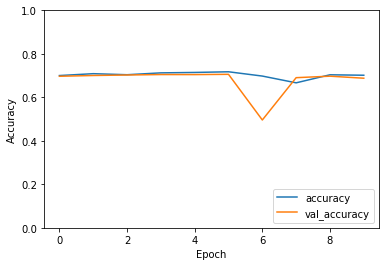

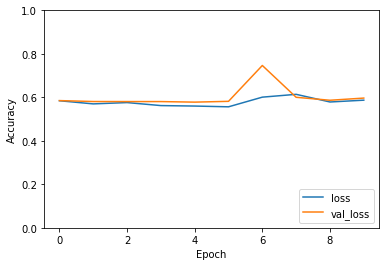

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(imgs_test,  labels_test, verbose=2)


In [31]:
# make predictions
hh_data_test    = np.asarray([x for x,y in zip(imgs_test, labels_test) if y==1])
hh_labels_test  = np.asarray([y for x,y in zip(imgs_test, labels_test) if y==1])
qcd_data_test   = np.asarray([x for x,y in zip(imgs_test, labels_test) if y==0])
qcd_labels_test = np.asarray([y for x,y in zip(imgs_test, labels_test) if y==0])

score_hh = model.evaluate(hh_data_test, hh_labels_test)
score_qcd = model.evaluate(qcd_data_test, qcd_labels_test)
print(score_hh, score_qcd)
pred_hh = model.predict(hh_data_test)
pred_qcd = model.predict(qcd_data_test)

2380/2380 [==============================] - 1s 580us/step
[0.6339645187716839, 0.6491735577583313] [0.5585501423903874, 0.7273108959197998]


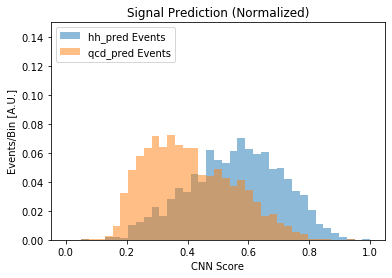

In [39]:
_nBins = 40
predictionResults = {'hh_pred':pred_hh, 'qcd_pred':pred_qcd}
compareManyHistograms( predictionResults, ['hh_pred', 'qcd_pred'], 2, 'Signal Prediction', 'CNN Score', 0, 1, _nBins, _yMax = 5, _normed=True, savePlot=False )


In [42]:
# *** 4. Get best cut value for CNN assuming some minimal amount of signal
#returnBestCutValue('CNN', pred_hh.copy(), pred_qcd.copy(), _minBackground=400e3, _testingFraction=0.1)